# Exercícios - Estatística II

### Questão 1

Uma relação bem importante entre uma população e uma amostra, é que uma amostra pode ser significativa daquela população (ou seja, podemos inferir que a média e variância da amostra será bem próximo do valor real da população), isto quando essa amostra for grande o suficiente para isso. Vamos fazer algumas simulações utilizando o _Python_ para testar esses conceicos, resolvendo os itens a seguir:

__A)__ Crie uma lista com número aleatórios entre 20 e 50 e que essa lista contenham 1 milhão de elementos;

In [1]:
# Import das Libs
import numpy as np
import pandas as pd

In [2]:
# Define uma semente aleatória
np.random.seed(42)

# tamanho da população
n = 1000000

# Criando a população
pop = list(np.random.randint(20, 50, size = n))

# Print de 5 elementos da população
pop[:5]

[26, 39, 48, 34, 30]

__B)__ Calcule a média e a variância para essa lista;

In [3]:
# Print das metricas da população
print("Métricas da População: ")
print('Média:     ', np.round(np.mean(pop),2))
print('Variância: ', np.round(np.var(pop),2))

Métricas da População: 
Média:      34.49
Variância:  74.89


__C)__ Faça amostra aleatórias de diversos tamanhos (10, 100, 1.000 e 10.000 elementos) e calcule as mesmas métricas que o item anterior, para avaliar o conceito proposto no enunciado

In [4]:
# Import da biblioteca random para os samples
import random

# Cria uma lista com os diversos tamanhos de amostras
n_amostras = [10, 100, 1000, 10000]

# Loop para fazer a amostra aleatória e calcular as métricas
for n in n_amostras:
    amostra = list(random.sample(pop, n))
    print('Amostra com {} elementos'.format(n))
    print('Média:     ', np.round(np.mean(amostra),2))
    print('Variância: ', np.round(np.var(amostra),2))
    print('=================================')

Amostra com 10 elementos
Média:      33.7
Variância:  21.61
Amostra com 100 elementos
Média:      34.26
Variância:  60.47
Amostra com 1000 elementos
Média:      34.26
Variância:  76.9
Amostra com 10000 elementos
Média:      34.32
Variância:  74.17


Note que a partir de 1000 elementos já temos valores bem próximos com a realidade da população onde os 1000 elementos representam apesar 0,1% da população, corroborando com o conceito de amostragem dito no enunciado.

### Solução Alternativa

In [5]:
# Import da biblioteca random para os samples
import random
df = pd.DataFrame(data=[np.round(np.mean(amostra),2), np.round(np.var(amostra),2)], index=['Média', 'Variância'], columns=[('população','value')])

# Cria uma lista com os diversos tamanhos de amostras
n_amostras = [10, 100, 1000, 10000]
df
# Loop para fazer a amostra aleatória e calcular as métricas
for n in n_amostras:
    amostra = list(random.sample(pop, n))
    df[(f'{n} elementos', 'value')] = [np.round(np.mean(amostra),2), np.round(np.var(amostra),2)]
    df[(f'{n} elementos', 'error')] = [np.round(np.mean(amostra),2)-df[('população','value')]['Média'], np.round(np.var(amostra),2)-df[('população','value')]['Variância']]

df.columns = pd.MultiIndex.from_tuples(df.columns)
df

população 10 elementos        100 elementos       1000 elementos  \
              value        value  error         value error          value   
Média         34.32        34.50   0.18         35.60  1.28          34.27   
Variância     74.17       102.45  28.28         73.96 -0.21          77.14   

                10000 elementos        
          error           value error  
Média     -0.05           34.19 -0.13  
Variância  2.97           74.98  0.81

### Questão 2

Neste exercício vamos demonstrar a importância de uma amostragem estratificada quando temos grupos significantes dentro da população. Faça os seguintes itens:

__A)__ Crie 3 listas de números aleatórios sendo elas:
- uma lista com números aleatórios entre 40 e 50 contendo 10.000 elementos;
- uma lista com números aleatórios entre 10 e 20 contendo 6.000 elementos;
- uma lista com números aleatórios entre 80 e 90 contendo 4.000 elementos.

In [6]:
# Import das Libs
import numpy as np
import pandas as pd

In [7]:
# Define uma semente aleatória
np.random.seed(42)

# tamanho das listas
n1 = 10000
n2 = 6000
n3 = 4000

# Criando as listas
lista1 = list(np.random.randint(40, 50, size = n1))
lista2 = list(np.random.randint(10, 20, size = n2))
lista3 = list(np.random.randint(80, 90, size = n3))


# Print de 5 elementos das listas
print('Listas: ')
print('Lista 1 - Tamanho: {}, 5 Elementos: {}'.format(len(lista1), lista1[:5]))
print('Lista 2 - Tamanho: {}, 5 Elementos: {}'.format(len(lista2), lista2[:5]))
print('Lista 3 - Tamanho: {}, 5 Elementos: {}'.format(len(lista3), lista3[:5]))

Listas: 
Lista 1 - Tamanho: 10000, 5 Elementos: [46, 43, 47, 44, 46]
Lista 2 - Tamanho: 6000, 5 Elementos: [12, 14, 12, 19, 16]
Lista 3 - Tamanho: 4000, 5 Elementos: [82, 84, 84, 84, 83]


__B)__ Calcule a média e a variância para cada uma das 3 listas;

In [8]:
# Calculo métricas lista 1
mean1 = np.round(np.mean(lista1),2)
var1  = np.round(np.var(lista1),2)

# Calculo métricas lista 2
mean2 = np.round(np.mean(lista2),2)
var2  = np.round(np.var(lista2),2)

# Calculo métricas lista 3
mean3 = np.round(np.mean(lista3),2)
var3  = np.round(np.var(lista3),2)

# Print dos resultados
print('Métricas - Lista 1: ')
print('Amostra com {} elementos'.format(n1))
print('Média:     ', mean1)
print('Variância: ', var1)
print('=================================')
print('Métricas - Lista 2: ')
print('Amostra com {} elementos'.format(n2))
print('Média:     ', mean2)
print('Variância: ', var2)
print('=================================')
print('Métricas - Lista 3: ')
print('Amostra com {} elementos'.format(n3))
print('Média:     ', mean3)
print('Variância: ', var3)
print('=================================')

Métricas - Lista 1: 
Amostra com 10000 elementos
Média:      44.5
Variância:  8.37
Métricas - Lista 2: 
Amostra com 6000 elementos
Média:      14.52
Variância:  8.19
Métricas - Lista 3: 
Amostra com 4000 elementos
Média:      84.5
Variância:  8.4


__C)__ Calcule a média e a variância para a população, onde a população seja as 3 listas juntas;


__Dica.:__ Neste caso, temos que trabalhar com média e variância ponderada!

Para calcular a média ponderada devemos seguir a fórmula abaixo:
    
$$\overline{x}_{p} = \sum_{i=1}^{k} p_i \overline{x}_i$$

onde $k$ e o número de grupos dentro da população e $p_i$ os pesos de cada grupo definido por $p_i = n_i/N$

Já para o variância ponderada, deve-se calcular da seguinte forma:

$$S_{p}^{2} = \sum_{i=1}^{k} S_{i}^{2}$$

In [9]:
# Total da população
N = n1 + n2 + n3

# peso 1
p1 = n1/N

# peso 2
p2 = n2/N

# peso 3
p3 = n3/N

# Média Ponderada das listas
mean_N = p1*mean1 + p2*mean2 + p3*mean3

# Variância Ponderada das listas
var_N = var1 + var2 + var3

# Print das métricas da população
print('Métricas da População: ')
print('Amostra com {} elementos'.format(N))
print('Média Ponderada:     ', mean_N)
print('Variância Ponderada: ', var_N)

Métricas da População: 
Amostra com 20000 elementos
Média Ponderada:      43.506
Variância Ponderada:  24.96


__D)__ Una as 3 listas em uma só e retire uma amostra de 1% da lista resultante. Calcule a média e a variância para esta amostra;

In [10]:
# Cria a população
pop = lista1 + lista2 + lista3

# Tamanho da população
len(pop)

20000

In [11]:
# Define a amostra de uma população
amostra = list(random.sample(pop, 200))

# Print das metricas da amostra
print('Amostra com {} elementos'.format(200))
print('Média:     ', np.round(np.mean(amostra),2))
print('Variância: ', np.round(np.var(amostra),2))
print('=================================')

Amostra com 200 elementos
Média:      45.02
Variância:  658.3


__E)__ Por fim, faça uma amostra estratificada da seguinte forma: faça uma amostra aleatória de 1% de cada uma das 3 listas e em seguida calcule a média e a variância para a amostra estratificada (será necessário utilizar a média e variância ponderada!).

In [12]:
# Amostra 1
# Define a amostra de uma população
amostra1 = list(random.sample(lista1, 100))

# Metricas amostra 1
mean_amostra1 = np.round(np.mean(amostra1),2)
var_amostra1 = np.round(np.var(amostra1),2)

# Print das metricas da amostra
print('Amostra 1 com {} elementos'.format(100))
print('Média:     ', mean_amostra1)
print('Variância: ', var_amostra1)
print('=================================')

# Amostra 2
# Define a amostra de uma população
amostra2 = list(random.sample(lista2, 60))

# Metricas amostra 1
mean_amostra2 = np.round(np.mean(amostra2),2)
var_amostra2 = np.round(np.var(amostra2),2)

# Print das metricas da amostra
print('Amostra 2 com {} elementos'.format(60))
print('Média:     ', mean_amostra2)
print('Variância: ', var_amostra2)
print('=================================')

# Amostra3
# Define a amostra de uma população
amostra3 = list(random.sample(lista3, 40))

# Metricas amostra 1
mean_amostra3 = np.round(np.mean(amostra3),2)
var_amostra3 = np.round(np.var(amostra3),2)

# Print das metricas da amostra
print('Amostra 3 com {} elementos'.format(40))
print('Média:     ', mean_amostra3)
print('Variância: ', var_amostra3)
print('=================================')

Amostra 1 com 100 elementos
Média:      44.82
Variância:  7.71
Amostra 2 com 60 elementos
Média:      13.87
Variância:  7.38
Amostra 3 com 40 elementos
Média:      84.88
Variância:  8.26


In [13]:
# Média Ponderada das listas
mean_amostra_N = p1*mean_amostra1 + p2*mean_amostra2 + p3*mean_amostra3

# Variância Ponderada das listas
var_amostra_N = var_amostra1 + var_amostra2 + var_amostra3

# Print das métricas da população
print('Métricas da Amostra total: ')
print('Amostra com {} elementos'.format(200))
print('Média Ponderada:     ', mean_amostra_N)
print('Variância Ponderada: ', var_amostra_N)

Métricas da Amostra total: 
Amostra com 200 elementos
Média Ponderada:      43.547
Variância Ponderada:  23.35


__F)__ Compare o resultado das métricas para a amostra e a amostra estratificada com o valor das métricas da população.

Os resultados para amostras estratificada ficou bem mais próximo do que para uma maostragem simples, principalmente levando em consideração a variância. O que demonstra a importância de levarmos em consideração uma amostra estratificada quando sabemos que tem grupos bem definidos e distintos dentro da população.

### Questão 3

 Uma máquina de sorvete está regulada de modo a servir uma média de 120g por casquinha. Se a quantidade servida por casquinha seguir uma distribuição normal com desvio padrão de 18g, determine a porcentagem de casquinhas que conterão mais de 150g de sorvete.

Sabendo que as casquinhas seguem uma distribuição normal, temos que:

$$
P(X \geq 150) = P\left( \frac{X-\mu}{\sigma}\geq \frac{150-\mu}{\sigma}\right) = P\left( Z \geq \frac{150-\mu}{\sigma}\right) = 1 - P\left( Z < \frac{150-\mu}{\sigma}\right)
$$

In [14]:
import scipy.stats as st
import numpy as np

# Definindo as metricas
media = 120
dp = 18

# Calculand o valor Z para o nosso caso
z = (150-media)/dp

print('A probabilidade de ter mais que 150g é igual a: ', np.round((1-st.norm.cdf(z))*100, 2), '%')

A probabilidade de ter mais que 150g é igual a:  4.78 %


### Questão 4

O peso médio de 500 estudantes do sexo masculino de uma determinada universidade é 71 Kg e o desvio padrão é 5,3 Kg. Admitindo que os pesos são normalmente distribuídos, determine a oercentagem de estudantes que pesam entre 65 e 72,5 kg

Sabendo que os pesos dos estudantes seguem uma distribuição normal, temos que:

$$
P(65 \leq X \leq 72,5) = P\left(\frac{65-\mu}{\sigma} \leq \frac{X-\mu}{\sigma} \leq \frac{72,5-\mu}{\sigma}\right)=P\left(\frac{65-\mu}{\sigma} \leq Z \leq \frac{72,5-\mu}{\sigma}\right) = 
$$
$$
= P\left(Z \leq \frac{72,5-\mu}{\sigma}\right)-P\left( Z \leq \frac{65-\mu}{\sigma}\right)
$$

In [15]:
# importando as bilbiotecas
import scipy.stats as st
import numpy as np

# Definindo as métricas
media = 71
dp = 5.3

#Calculando Z1 e Z2
z1 = (65-media)/dp
z2 = (72.5-media)/dp

# Print do resultado
print('Probabilidade:',np.round((st.norm.cdf(z2)-st.norm.cdf(z1))*100, 2), '%')

Probabilidade: 48.26 %


### Questão 5

Uma fábrica anuncia que o índice de cafeína em um refrigerante de uma dada marca é igual a 20 mg por lata. Um laboratório realiza 20 análises do índice obtendo: 22, 19, 21, 22, 20, 18, 27, 20, 21, 19, 20, 22, 17, 20, 21,18, 25, 16, 20, 21. Sabe-se que o índice de cafeína do refrigerante dessa marca se distribui normalmente com variância 4 mg$^2$. Pode-se aceitar a afirmação do fabricante, ao nível de 5%?

Teremos um teste de hipótese para uma distribuição que seguem o comportamento de uma distribuição normal, onde as hipóteses a serem testadas são:

$H_0: \mu = 20$<br>
$H_1: \mu > 20$

In [16]:
# Import das libs
import numpy as np
import matplotlib.pyplot as plt

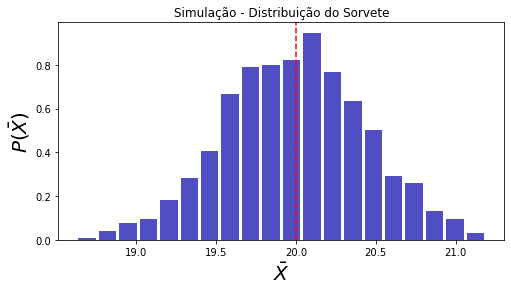

In [17]:
# Define uma semente aleatória
np.random.seed(0)

# Define os parâmetros
mu = 20    # hipotese a ser testada
sigma = 2  # desvio padrao populacional
n = 20     # tamanho da amostra
Ns = 1000  # numero de simulacoes
Xm=[]      # distribuicao da media amostral

# loop para gerar diversas amostras para o nosso teste
for s in range(1, Ns):
    x = np.random.normal(mu, sigma, n) # sorteia uma amostra de tamanho n
    Xm.append(np.mean(x))

# Define o tamanho do gráfico    
plt.figure(figsize=(8,4))

# Plot do histograma
a = plt.hist(x=Xm, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85, label = str(Ns), density=True)

# Plot da linha média
plt.axvline(x=mu, color='r', linestyle='--', label = 'Media')

# cria um titulo
plt.title('Simulação - Distribuição do Sorvete')

# Nome do eixo X
plt.xlabel(r'$\bar{X}$', fontsize=20)

# nome do eixo Y
plt.ylabel(r'$P(\bar{X})$', fontsize=20)

# Mostra o gráfico
plt.show()  

Depois de gerar as amostras, vamos verificar a fração de observações que permitem que verifiquemos $H_0$.

In [18]:
# Amostra
X = [22, 19, 21, 22, 20, 18, 27, 20, 21, 19, 20, 22, 17, 20, 21,18, 25, 16, 20, 21]

# Média Amostra
xobs = np.mean(X)

# Intervalo de confiança
alpha = 95

# Valor Crítico
xc = np.percentile(Xm, alpha)
print('Xc=', xc, '  Xobs = ', xobs)

# Verifica se acieta ou rejeita H0
if(xobs < xc):
    print("Aceitamos H0")
else:
    print("Rejeitamos H0")

Xc= 20.730112413622226   Xobs =  20.45
Aceitamos H0


Podemos ainda ver esse resultado na figura.

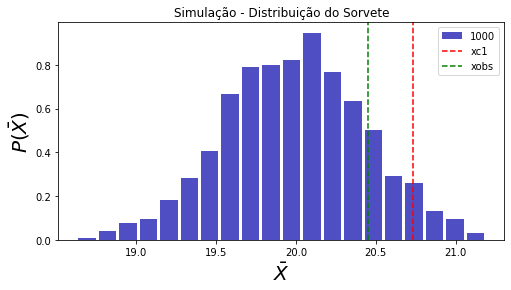

In [19]:
# Define o tamanho do gráfico    
plt.figure(figsize=(8,4))

# Plot do histograma
a = plt.hist(x=Xm, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85, label = str(Ns), density=True)

# Plot da linha critica e observada
plt.axvline(x=xc, color='red', linestyle='--', label = 'xc1')
plt.axvline(x=xobs, color='green', linestyle='--', label = 'xobs')

# cria um titulo
plt.title('Simulação - Distribuição do Sorvete')

# Nome do eixo X
plt.xlabel(r'$\bar{X}$', fontsize=20)

# nome do eixo Y
plt.ylabel(r'$P(\bar{X})$', fontsize=20)

#Cria a legenda
plt.legend()

# Mostra o gráfico
plt.show()  